## Import Packages 

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img
import os
import shutil
import random
import collections
import warnings
warnings.filterwarnings("ignore")
# Check if GPU is available
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

# Print GPU details
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    for gpu in gpu_devices:
        print("Device:", gpu)
else:
    print("No GPU found. Make sure GPU is enabled in Kaggle settings.")
# Set TensorFlow to run on GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("GPU enabled for TensorFlow!")
    except RuntimeError as e:
        print(e)

Num GPUs Available: 1
Device: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
GPU enabled for TensorFlow!


## Load Data

In [5]:
# Define paths
train_path = r'/kaggle/input/balanced-augmented-data/Balanced_Training/Balanced_Training'
valid_path = r'/kaggle/input/balanced-augmented-data/Validation/Validation'

# Define image size and batch size
img_size = (224,224)
batch_size = 32

# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path, image_size=img_size, batch_size=batch_size, label_mode='categorical')

valid_dataset = tf.keras.utils.image_dataset_from_directory(
    valid_path, image_size=img_size, batch_size=batch_size, label_mode='categorical')

Found 3780 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.


## Calculate Class Distribution

In [ ]:
# Get class names
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f"Class Names: {class_names}")


train_labels=[]
valid_labels=[]
for images, labels in train_dataset:  
    train_labels.extend(np.argmax(labels.numpy(), axis=1))  

for images, labels in valid_dataset:  
    valid_labels.extend(np.argmax(labels.numpy(), axis=1))  

# Count occurrences
train_class_distribution = collections.Counter(train_labels)
valid_class_distribution = collections.Counter(valid_labels)

# Print class distribution
print('Train Class Distribution -------------')
for class_idx, count in train_class_distribution.items():
    print(f"Class '{class_names[class_idx]}' has {count} samples")
print('Valid Class Distribution--------------')
for class_idx, count in valid_class_distribution.items():
    print(f"Class '{class_names[class_idx]}' has {count} samples")

Class Names: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']
Train Class Distribution -------------
Class 'Gum' has 540 samples
Class 'MC' has 540 samples
Class 'CoS' has 540 samples
Class 'OC' has 540 samples
Class 'OLP' has 540 samples
Class 'OT' has 540 samples
Class 'CaS' has 540 samples
Valid Class Distribution--------------
Class 'OC' has 108 samples
Class 'OLP' has 180 samples
Class 'MC' has 180 samples
Class 'Gum' has 120 samples
Class 'CaS' has 160 samples
Class 'CoS' has 149 samples
Class 'OT' has 131 samples


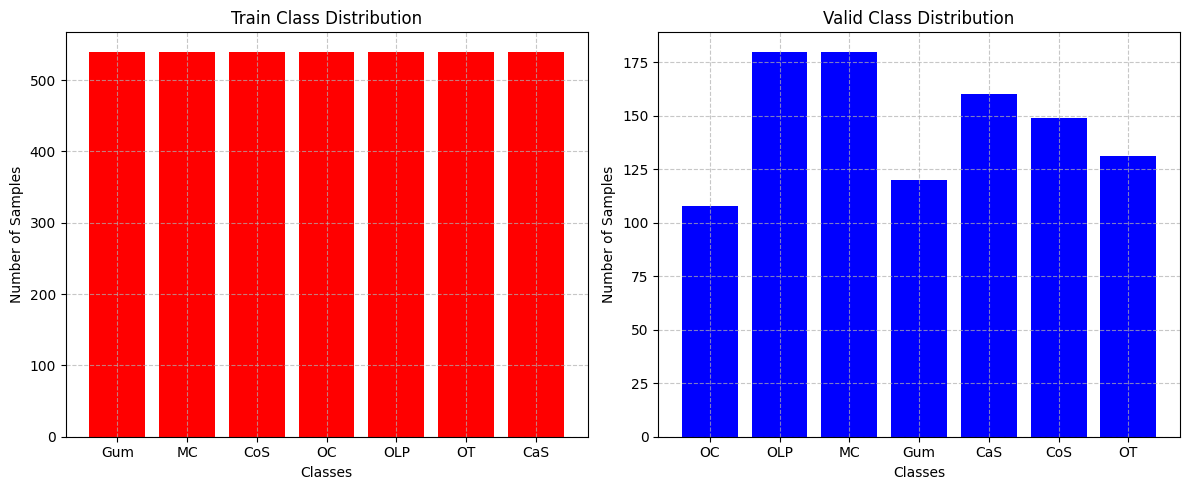

In [7]:
# Convert dictionary to lists for plotting
Train_labels = [class_names[idx] for idx in train_class_distribution.keys()]
Train_counts = list(train_class_distribution.values())
Valid_labels = [class_names[idx] for idx in valid_class_distribution.keys()]
Valid_counts = list(valid_class_distribution.values())
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# First bar plot: Original distribution
axes[0].bar(Train_labels, Train_counts, color='red')
axes[0].set_title("Train Class Distribution")
axes[0].set_xlabel("Classes")
axes[0].set_ylabel("Number of Samples")
axes[0].grid(True, linestyle="--", alpha=0.7)
# Second bar plot: Balanced distribution
axes[1].bar(Valid_labels, Valid_counts, color='blue')
axes[1].set_title("Valid Class Distribution")
axes[1].set_xlabel("Classes")
axes[1].set_ylabel("Number of Samples")
axes[1].grid(True, linestyle="--", alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

## Image Viusalization

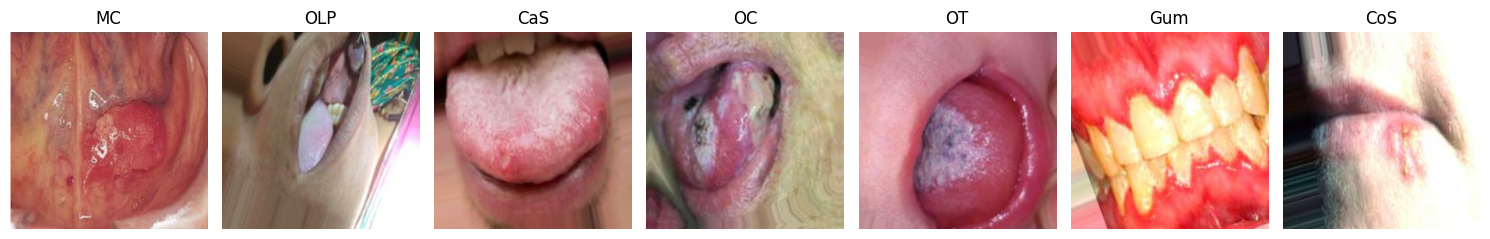

In [8]:
# Dictionary to store one sample image per class
sample_images = {}

# Iterate through dataset to collect one image per class
for images, labels in train_dataset:
    for i in range(images.shape[0]):
        class_index = np.argmax(labels[i])  # Get class index
        class_name = class_names[class_index]

        if class_name not in sample_images:  # Store only one image per class
            sample_images[class_name] = images[i].numpy().astype("uint8")

        if len(sample_images) == num_classes:  # Stop when we have all classes
            break
    if len(sample_images) == num_classes:
        break

# Plot the images
fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))
for ax, (class_name, img) in zip(axes, sample_images.items()):
    ax.imshow(img)
    ax.set_title(class_name)
    ax.axis("off")

plt.tight_layout()
plt.show()

## Data Preprocessing

In [9]:
# Normalize pixel values
normalization_layer=tf.keras.layers.Rescaling(1.0/255.0)
train_dataset_prep=train_dataset.map(lambda x,y:(normalization_layer(x), y))
valid_dataset_prep=valid_dataset.map(lambda x,y:(normalization_layer(x), y))

# Cache and prefetch for better performance and use repeat so the model wont run out of data while fitting
train_dataset_prep = train_dataset_prep.cache().shuffle(3080).prefetch(tf.data.AUTOTUNE).repeat()
valid_dataset_prep = valid_dataset_prep.cache().prefetch(tf.data.AUTOTUNE).repeat()

## Balanced Data Augmentation

#### This Data is Already augmented but here is the code that was executed to augment the data 

In [ ]:
# import os
# import random
# import shutil
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import load_img, img_to_array, save_img

# # Define paths
# train_path = r'F:\prcatice\Computer Vision Intern\Week 2\Code\Training'
# output_path = r'F:\prcatice\Computer Vision Intern\Week 2\Code\Balanced_Training'
# os.makedirs(output_path, exist_ok=True)

# # Define image size
# img_size = (256, 256)

# # Define augmentation pipeline
# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip('horizontal'),
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2),
# ])

# # Get class distributions
# train_dataset = tf.keras.utils.image_dataset_from_directory(
#     train_path, image_size=img_size, batch_size=32, label_mode='categorical')

# class_names = train_dataset.class_names
# print(f"Class Names: {class_names}")

# # Collect image paths and labels
# image_paths = {class_name: [] for class_name in class_names}
# for class_name in class_names:
#     class_dir = os.path.join(train_path, class_name)
#     image_paths[class_name] = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if img.lower().endswith(('png', 'jpg', 'jpeg'))]

# train_class_distribution = {class_name: len(image_paths[class_name]) for class_name in class_names}
# print("Original Class Distribution:", train_class_distribution)

# # Find the maximum count (most frequent class)
# max_samples = max(train_class_distribution.values())

# # Create output directories for balanced dataset
# for class_name in class_names:
#     os.makedirs(os.path.join(output_path, class_name), exist_ok=True)

# # Copy original images to balanced dataset directory
# for class_name in class_names:
#     for img_path in image_paths[class_name]:
#         dest_path = os.path.join(output_path, class_name, os.path.basename(img_path))
#         shutil.copy(img_path, dest_path)  # Copy original images

# # Perform augmentation for underrepresented classes
# for class_name, count in train_class_distribution.items():
#     existing_images = image_paths[class_name]
#     num_to_generate = max_samples - count  # Number of images needed to balance the dataset

#     print(f"Augmenting {class_name}: Adding {num_to_generate} images")

#     for i in range(num_to_generate):
#         img_path = random.choice(existing_images)  # Randomly pick an image
#         img = load_img(img_path, target_size=img_size)
#         img_array = img_to_array(img)
#         img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

#         # Apply augmentation
#         augmented_img_array = data_augmentation(img_array, training=True)
#         augmented_img_array = tf.squeeze(augmented_img_array).numpy().astype("uint8")

#         # Save augmented image
#         save_path = os.path.join(output_path, class_name, f"aug_{i}_{os.path.basename(img_path)}")
#         save_img(save_path, augmented_img_array)

# print("Balanced dataset created successfully!")


## Modeling

### Base Model Archticture

In [ ]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights="imagenet",include_top=False,input_shape=(224,224,3))
base_model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

batch_size = 32  
steps_per_epoch = 3780 // batch_size
validation_steps = 1028 // batch_size

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)  
x = Dense(256, activation="relu")(x)  
x = Dropout(0.5)(x)  
output_layer = Dense(num_classes, activation="softmax")(x) 

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

checkpoint_callback = ModelCheckpoint(
    "best_teeth_defect_classifier.keras",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    mode="min",
    verbose=1
)

history_base=model.fit(train_dataset_prep,
          validation_data=valid_dataset_prep,
          epochs=20,
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps, 
          callbacks=[checkpoint_callback])

base_model.trainable = True
for layer in base_model.layers[:150]:
    layer.trainable = False

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss="categorical_crossentropy",
    metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)


history_fine_tuned=model.fit(train_dataset_prep,
          validation_data=valid_dataset_prep,
          epochs=30,
          steps_per_epoch=steps_per_epoch,
          validation_steps=validation_steps,
          callbacks=[checkpoint_callback])

model.save("final_teeth_defect_classifier.h5")


Epoch 1/20
116/118 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 1.7344 - precision_14: 0.5448 - recall_14: 0.2048
Epoch 1: val_loss improved from inf to 0.82643, saving model to best_teeth_defect_classifier.keras
118/118 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 1.7249 - precision_14: 0.5484 - recall_14: 0.2077 - val_loss: 0.8264 - val_precision_14: 0.8633 - val_recall_14: 0.5488
Epoch 2/20
116/118 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8667 - precision_14: 0.7890 - recall_14: 0.5459
Epoch 2: val_loss improved from 0.82643 to 0.58470, saving model to best_teeth_defect_classifier.keras
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.8648 - precision_14: 0.7896 - recall_14: 0.5470 - val_loss: 0.5847 - val_precision_14: 0.9077 - val_recall_14: 0.7108
Epoch 3/20
116/118 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6235 - precision_14: 0.8562 - recall_14: 0.6944
Epoch 3: val_loss improved from 0.58470 to 0.41608, saving model to best_teeth_defect_classifier.keras
118/118 ━━━━━━━━━━━━━

## Load Best Model

In [ ]:
from tensorflow.keras.models import load_model
# Load the model from the saved file
model = load_model('best_teeth_defect_classifier.keras')  # Use the correct file name
# Check the model summary to confirm it has been loaded correctly
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_10            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_10[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 4,072,791 (15.54 MB)

 Trainable params: 742,535 (2.83 MB)

 Non-trainable params: 1,845,184 (7.04 MB)

 Optimizer params: 1,485,072 (5.67 MB)

## Visualize Model Results

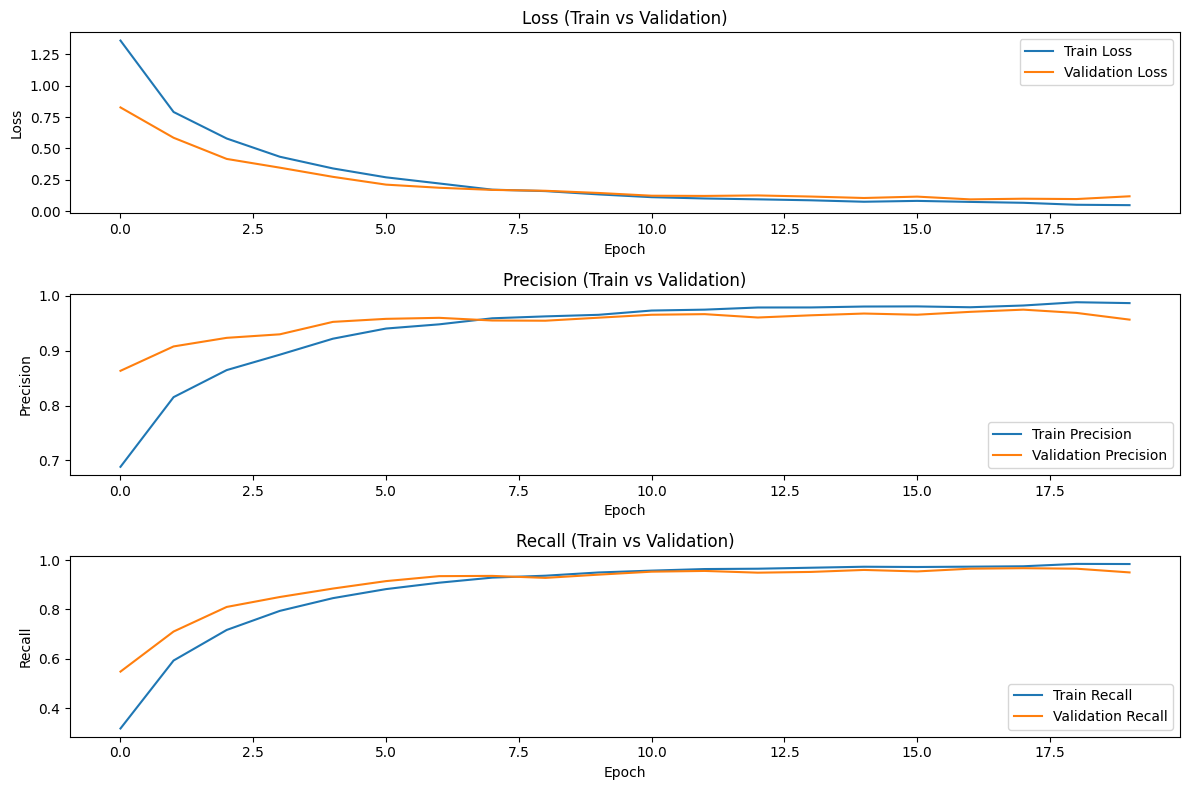

In [ ]:
history_dict = history_base.history
# Extract values for loss, precision, and recall
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_precision = history_dict['precision_14']  # Change precision_8 if necessary
val_precision = history_dict['val_precision_14']  # Change precision_8 if necessary
train_recall = history_dict['recall_14']  # Change recall_8 if necessary
val_recall = history_dict['val_recall_14']  # Change recall_8 if necessary
#Create a figure with multiple subplots
plt.figure(figsize=(12, 8))
#Plot Loss
plt.subplot(3, 1, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss (Train vs Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
#Plot Precision
plt.subplot(3, 1, 2)
plt.plot(train_precision, label='Train Precision')
plt.plot(val_precision, label='Validation Precision')
plt.title('Precision (Train vs Validation)')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
#Plot Recall
plt.subplot(3,1,3)
plt.plot(train_recall, label='Train Recall')
plt.plot(val_recall, label='Validation Recall')
plt.title('Recall (Train vs Validation)')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
#Show the plots
plt.tight_layout()
plt.show()

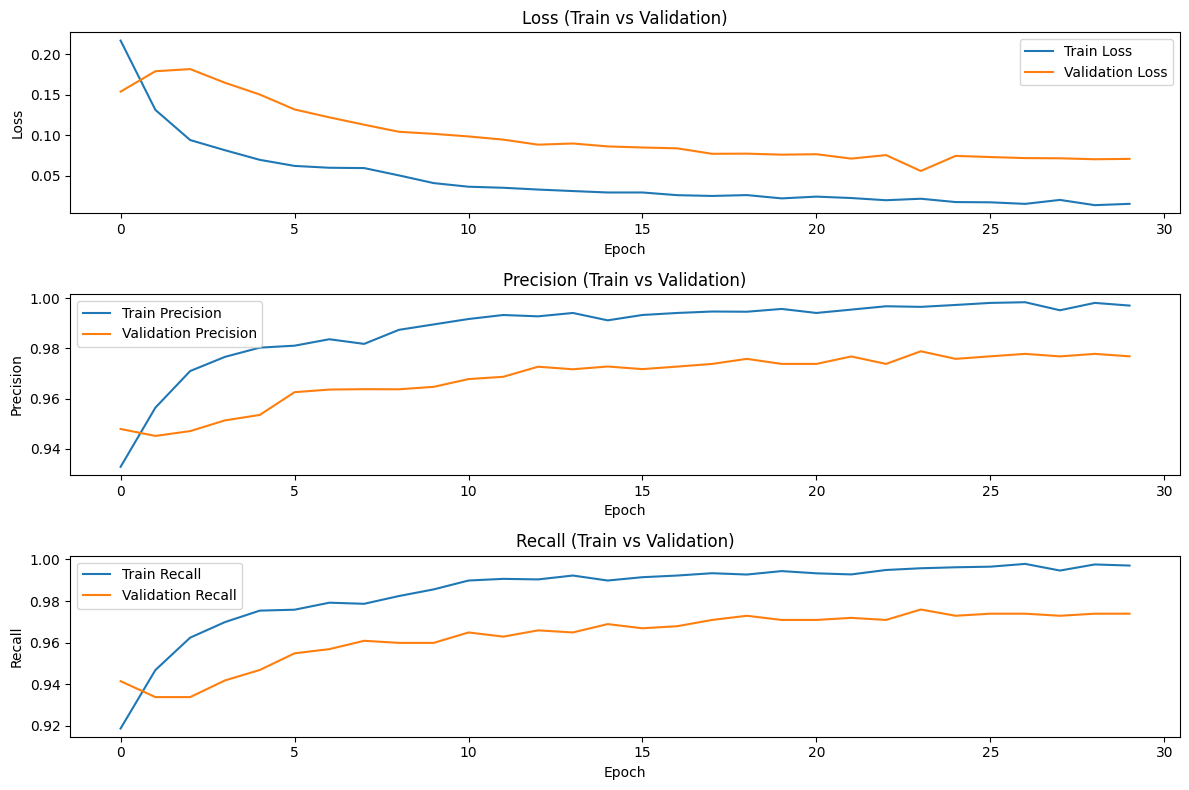

In [ ]:
history_dict1 = history_fine_tuned.history
#Extract values for loss, precision, and recall
train_loss = history_dict1['loss']
val_loss = history_dict1['val_loss']
train_precision = history_dict1['precision_15']  
val_precision = history_dict1['val_precision_15']  
train_recall = history_dict1['recall_15'] 
val_recall = history_dict1['val_recall_15']  
#Create a figure with multiple subplots
plt.figure(figsize=(12, 8))
#Plot Loss
plt.subplot(3,1,1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss (Train vs Validation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Plot Precision
plt.subplot(3,1,2)
plt.plot(train_precision, label='Train Precision')
plt.plot(val_precision, label='Validation Precision')
plt.title('Precision (Train vs Validation)')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.legend()
# Plot Recall
plt.subplot(3,1,3)
plt.plot(train_recall, label='Train Recall')
plt.plot(val_recall, label='Validation Recall')
plt.title('Recall (Train vs Validation)')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
# Show the plots
plt.tight_layout()
plt.show()

## Predict on some image samples

Found 1028 files belonging to 7 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


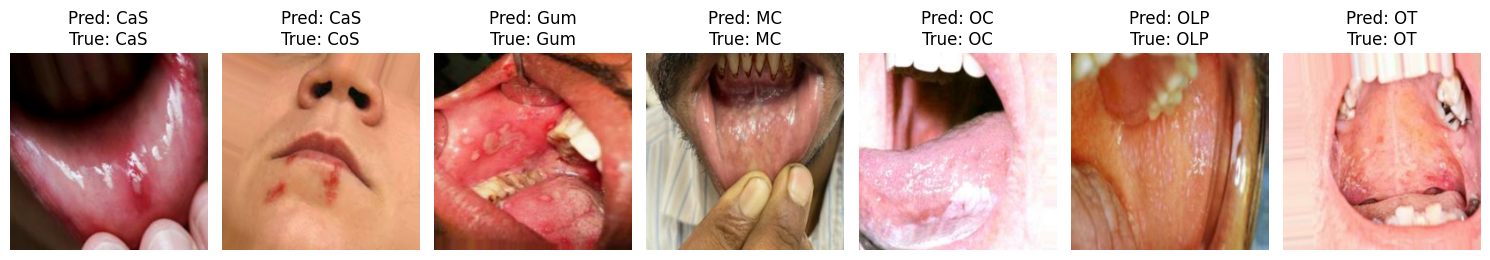

In [ ]:
valid_dataset_pred = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/balanced-augmented-data/Validation/Validation',  # Update with your actual validation directory path
    image_size=(224, 224),
    batch_size=32,
    label_mode='categorical'
)

class_names = valid_dataset_pred.class_names

def preprocess_image(image):
    image = tf.image.resize(image, (224, 224))  
    image = image / 255.0  
    return image

fig, axes = plt.subplots(1, len(class_names), figsize=(15, 5))  # Create a figure with subplots in one row

for i, class_name in enumerate(class_names):
    class_indices = np.where(np.array(valid_dataset_pred.class_names) == class_name)[0]
    for image_batch, label_batch in valid_dataset_pred:
        if np.any(np.argmax(label_batch, axis=1) == class_indices):
            
            class_images_indices = np.where(np.argmax(label_batch, axis=1) == class_indices)[0]
            random_index = np.random.choice(class_images_indices) 
            image = image_batch[random_index]
            true_label = label_batch[random_index]
            
            break 
    
    processed_image = preprocess_image(image)
    processed_image = tf.expand_dims(processed_image, axis=0) 
    predictions = model.predict(processed_image)
    predicted_class_index = np.argmax(predictions[0])  
    predicted_class_name = class_names[predicted_class_index]
    true_class_index = np.argmax(true_label)  
    true_class_name = class_names[true_class_index]
    axes[i].imshow(image.numpy().astype("uint8"))  
    axes[i].set_title(f"Pred: {predicted_class_name}\nTrue: {true_class_name}")
    axes[i].axis("off")
plt.tight_layout()
plt.show()


# Save The best Model

In [64]:
model.save('/kaggle/working/mymodel.h5')

In [66]:
model=load_model('/kaggle/working/mymodel.h5')